In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
n = 100   # mol
R = 8.314 # (N*m)/(mol*K)
T = 300   # K    
# P       # N/m^2
# V       # m^3

In [27]:
def vol_pres (X):
    return n*R*T/X

vol_pres(1000)


def get_data_PV(nb_train_data, nb_test_data, mean_epsilon0, std_epsilon0, mean_epsilon1, std_epsilon1, random_seed):
    
    np.random.seed(random_seed)

    epsilon0 = np.random.normal(mean_epsilon0, std_epsilon0, (nb_train_data))
    testEpsilon0 = np.random.normal(mean_epsilon0, std_epsilon0, (nb_test_data)) 
    
    epsilon1 = np.random.normal(mean_epsilon1, std_epsilon1, (nb_train_data))
    testEpsilon1 = np.random.normal(mean_epsilon1, std_epsilon1, (nb_test_data))

    V = np.random.uniform(0,10,(nb_train_data))
    testV = np.random.normal(0, 10, (nb_test_data))

    Vtilde = V+epsilon0
    testVtilde = testV+testEpsilon0

    P = vol_pres(V)
    testP = vol_pres(testV)

    Ptilde = P+epsilon1
    testPtilde = testP+testEpsilon1
    
    return {"P":P, "V":V, "testP":testP, "testV":testV, "Ptilde":Ptilde, "Vtilde":Vtilde, "testPtilde":testPtilde, "testVtilde":testVtilde} 

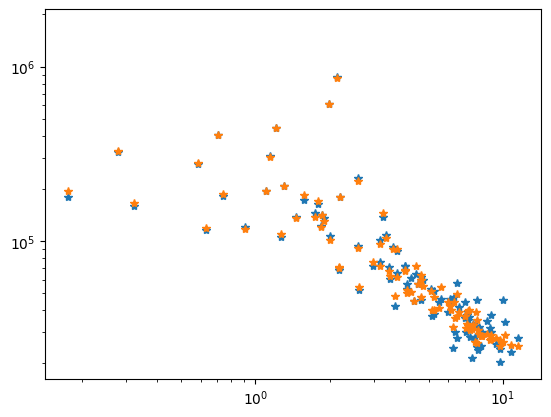

In [37]:
sol = get_data_PV(100, 100, 0, 1, 0, 5000,42)

plt.plot(sol["Vtilde"], sol["Ptilde"], "*")
plt.yscale("log")
plt.xscale("log")
plt.plot(sol["Vtilde"], sol["P"], "*")
plt.yscale("log")
plt.xscale("log")